
# <span style="color:rgb(213,80,0)">Analyze geographical spread of Sars\-Cov2  sequences inside GISAID database </span>


In [1]:
% Load table containing just Date, Country and Continent
% File XallReducedMay2025 comes after applying procedure
% multialignHeader to the table (or to the vector of structures)
% which contain the fields  Header and Sequence
% [T, indexWrongCountry, indexEmptyDate]= multialignHeader(X)
% See file ExAlignmentHeader.mlx for some examples.

load XallReducedMay2025
% size (X) = 15950908

## Manual insertion of Country Name and Continent (see Section 4.1 of the paper)

In [2]:
% There are 142 for which automatic extraction of country
% was not possible
boo=X.Country=="NaN";
seq=1:size(X,1);
RowsWithWrongCountry=seq(boo);

% The first 10 rows are referred to France
% 'Spike|hCoV-19/Europe/France/ARA-CHUST-GIMAP
X{RowsWithWrongCountry(1:10),"Country"}="France";
X{RowsWithWrongCountry(1:10),"Continent"}="Europe";

% The other rows are referred to South Africa
% 'Spike|hCoV-19/Africa/Johannesburg-3043/2020|2020-06-15|EPI_ISL_14594740
X{RowsWithWrongCountry(11:end),"Country"}="South Africa";
X{RowsWithWrongCountry(11:end),"Continent"}="Africa";

% Check that there are no missing countries
assert(sum(X.Country=="NaN")==0,"Missing countries are still present")

## Remove the animals

In [3]:
boo=X.Country=="Animal";
% Number of animals inside the GISEID database (they are 2584)
disp(['Number of animals=' num2str(sum(boo))])

Number of animals=2584

In [4]:
X(boo,:)=[];
% Number of remaining rows = 15950908

## Create table 8 (contingency table *of the number of submissions for continent and year)*

In [5]:
T1=pivot(X,'Rows','Continent','Columns','Date','ColumnsBinMethod','year','RowLabelPlacement','rownames','IncludeEmptyGroups',false);
disp(T1)

                           2019       2020          2021          2022          2023   
                           ____    __________    __________    __________    __________
    Asia                    27          62732      5.67e+05    8.9002e+05    2.0328e+05
    Europe                   1     3.4363e+05    3.6459e+06    3.4813e+06    3.0579e+05
    Africa                   0          17970         86865         53843         10029
    Oceania                  0          20886         51930    1.5391e+05         35771
    North America            0      2.783e+05     2.668e+06    2.3423e+06    3.2242e+05
    South America            0          16920    1.9033e+05    1.8183e+05         19884
    <missing_Continent>      0              0            13            17             0

## Pivot table of country and Date (by year)
#### JustEurope can be either false or true. If it is true just the countries belonging to Europe are analyzed.

In [6]:
justEurope=false;

if justEurope == true
    boo=X.Continent=="Europe";
    Xsel=X(boo,:);
else
    Xsel=X;
end
T1=pivot(Xsel,'Rows','Country','Columns','Date','ColumnsBinMethod','year','RowLabelPlacement','rownames');


## Get Population 2019\-2022 for all the countries found in the pivot table

Source [https://github.com/datasets/population.git](https://github.com/datasets/population.git)


In [7]:
warning('off', 'all');

P=readtable("population.csv");
warning('on', 'all');
% Population every year
boo=P.Year>=2019 & P.Year<=2023;
P1=P(boo,:);
P1=pivot(P1,Rows="CountryName",Columns="Year",DataVariable="Value",RowLabelPlacement="rownames");
% setdiff(T1.Properties.RowNames,P1.Properties.RowNames)

% Country renaming
P1.Properties.RowNames("Czechia")="Czechoslovakia";
P1.Properties.RowNames("Egypt, Arab Rep.")="Egypt";
P1.Properties.RowNames("Bahamas, The")="Bahamas";
P1.Properties.RowNames("Brunei Darussalam")="Brunei";
P1.Properties.RowNames("Congo, Dem. Rep.")="Democratic Republic of Congo";
P1.Properties.RowNames("Congo, Rep.")="Congo";
P1.Properties.RowNames("Cabo Verde")="Cape Verde";
P1.Properties.RowNames("Gambia, The")="Gambia";
P1.Properties.RowNames("Hong Kong SAR, China")="Hong Kong";
P1.Properties.RowNames("Iran, Islamic Rep.")="Iran";
P1.Properties.RowNames("Kyrgyz Republic")="Kyrgyzstan";
P1.Properties.RowNames("Lao PDR")="Laos";
P1.Properties.RowNames("Micronesia, Fed. Sts.")="Micronesia (country)";
P1.Properties.RowNames("Russian Federation")="Russia";
P1.Properties.RowNames("St. Lucia")="Saint Lucia";
P1.Properties.RowNames("St. Martin (French part)")="Saint Martin (French part)";
P1.Properties.RowNames("St. Vincent and the Grenadines")="Saint Vincent and the Grenadines";
P1.Properties.RowNames("Slovak Republic")="Slovakia";
P1.Properties.RowNames("Korea, Rep.")="South Korea";
P1.Properties.RowNames("Syrian Arab Republic")="Syria";
P1.Properties.RowNames("Turkiye")="Turkey";
P1.Properties.RowNames("Virgin Islands (U.S.)")="United States Virgin Islands";
P1.Properties.RowNames("Venezuela, RB")="Venezuela";
P1.Properties.RowNames("Viet Nam")="Vietnam";
P1.Properties.RowNames("West Bank and Gaza")="Palestine";
P1.Properties.RowNames("Caribbean small states")="Bonaire Sint Eustatius and Saba";
P1.Properties.RowNames("Timor-Leste")="East Timor";

In [8]:
% Find the population for the countries not present inside population.csv
countriesNonPresent=setdiff(T1.Properties.RowNames,P1.Properties.RowNames);
if ~isempty(countriesNonPresent)
    % Source ChatGPT
    Year = (2017:2023)';
    AnguillaPopulation = [14425, 14721, 14823, 14843, 14475, 14180, 14410];
    FrenchGuianaPopulation = [268700, 276128, 281678, 285133, 286618, 288382, 290110];
    GuadeloupePopulation = [390253, 387629, 384239, 383559, 384315, 383569, 382733];
    MartiniquePopulation = [372594, 368783, 364508, 361225, 360749, 361019, 359202];
    MayottePopulation = [250143, 259621, 269579, 279696, 289039, 299336, 309901];
    MontserratPopulation = [4603, 4569, 4540, 4508, 4479, 4453, 4420];
    ReunionPopulation = [853659, 855961, 861210, 863083, 871157, 881348, 886453];
    SaintBarthelemyPopulation = [9793, 9850, 9900, 9950, 10000, 10050, 10100];
    SaintKittsNevisPopulation = [48614, 48857, 49101, 49347, 49593, 49841, 50090];
    TaiwanPopulation = [23571227, 23588932, 23603121, 23561236, 23375314, 23264640, 23420442];
    WallisFutunaPopulation = [11918, 11800, 11686, 11616, 11568, 11300, 11151];

    Pop=[AnguillaPopulation;FrenchGuianaPopulation;GuadeloupePopulation;MartiniquePopulation; ...
        MayottePopulation; MontserratPopulation; ReunionPopulation; SaintBarthelemyPopulation; ...
        SaintKittsNevisPopulation; TaiwanPopulation; WallisFutunaPopulation];
    PopT=array2table(Pop,"RowNames",countriesNonPresent,'VariableNames',string(Year));
    P2=[P1;PopT(:,3:7)];
else
    P2=P1;
end
CheckRem=setdiff(T1.Properties.RowNames,P2.Properties.RowNames);
if ~isempty(CheckRem)
    error("FSDA:missingData","Missing population for some country")
end
[~,~,ib]=intersect(T1.Properties.RowNames,P2.Properties.RowNames,'stable');
Pfin=P2(ib,:);

% T1 and Pfin must have the same RowNames
assert(isequal(T1.Properties.RowNames,Pfin.Properties.RowNames),"Missingnames")

In [9]:
% Get table with countries lat and long for the countries found in pivot table
S=readtable('continents-according-to-our-world-in-data.xlsx');
S.Latitude=str2double(S.Latitude);
S.Longitude=str2double(S.Longitude);

assert(isempty(setdiff(T1.Properties.RowNames,S{:,1})),"Different RowNames")

## Load the corresponding shape file for the countries found in pivot table

Shape Files downloaded from  [https://www.naturalearthdata.com/downloads/](https://www.naturalearthdata.com/downloads/)


In [10]:
ShapeFile=readgeotable(['ShapeFiles' filesep 'ne_10m_admin_0_countries.shp']);

% Shape files for missing countries have been downloaded from
% https://gadm.org/download_country.html

load(['ShapeFiles' filesep 'ShapeFile2add'])
ShapeFile=[ShapeFile; S1];

% Tfin = table equal to T1 but with the addition of variables Entity Code
% Continents Latitude Longitude
% T1 = pivot table with country names
[~,~,ib]=intersect(T1.Properties.RowNames,S{:,1});
Tfin= [T1 S(ib,:)];

% Check that all the Shapes have been loaded
[CheckShape,iaa]=setdiff(string(Tfin.Code),string(ShapeFile.ADM0_A3));

if ~isempty(CheckShape)
    error("FSDA:missingData","Missing Shape for some country")
end

[inter,ia,ib]=intersect(string(Tfin.Code),string(ShapeFile.ADM0_A3),'stable');
ShapeFilefin=ShapeFile(ib,:);

## Find relative values 1000\*number of cases/population

In [11]:
Trel=1000.*Tfin(:,1:5)./Pfin(:,1:5);

thresh=2;
year="2020";
boo=Trel{:,year}>thresh;
Trel{boo,year}=2;
year="2021";
Trel{Trel{:,year}>thresh,year}=thresh;
year="2022";
Trel{Trel{:,year}>thresh,year}=thresh;
year="2023";
Trel{Trel{:,year}>thresh,year}=thresh;

## Geobubble


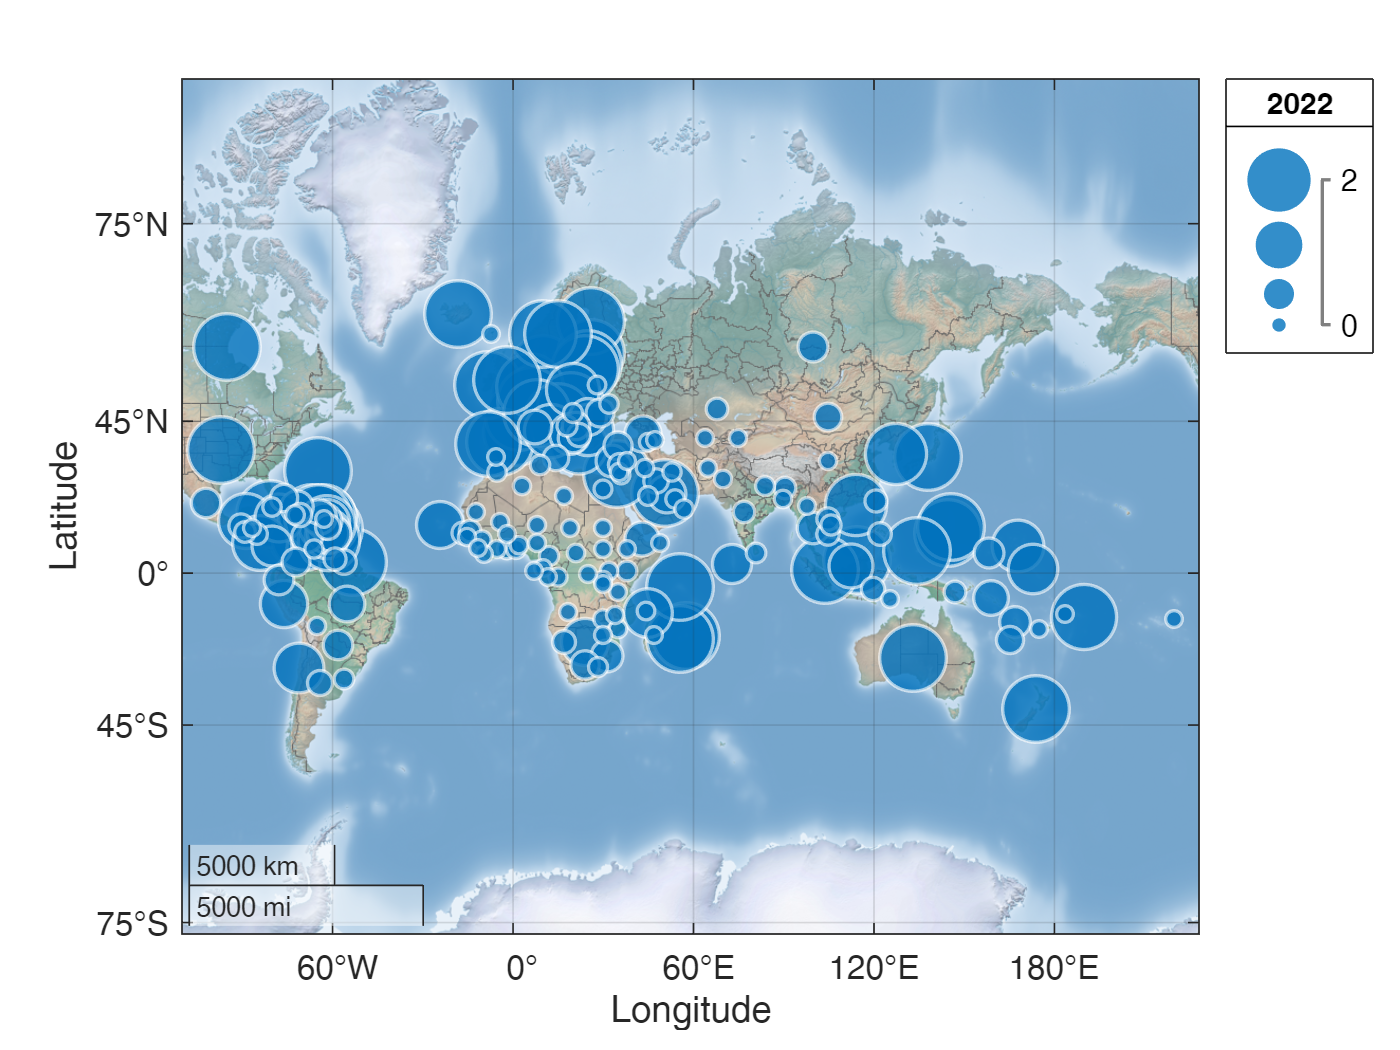

In [12]:
TrelWithLATLONG=[Trel Tfin(:,["Latitude" "Longitude"])];
geobubble(TrelWithLATLONG,"Latitude","Longitude","SizeVariable","2022",'Basemap','colorterrain');


## Interactive geoplot


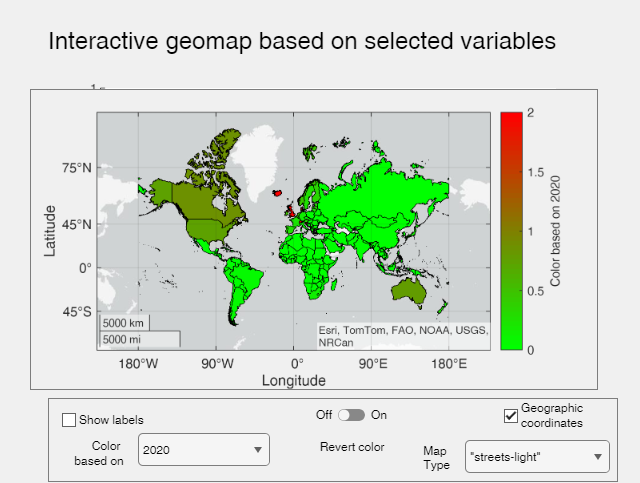

In [13]:
figure
geoplotFS(Trel(:,1:5),"2020",ShapeFilefin)

#### Show the original pivot tables of country and Date (by year): absolute numbers


In [14]:
disp('Pivot table with original frequencies')

Pivot table with original frequencies

In [15]:
disp(T1)

                                        2019      2020          2021          2022         2023   
                                        ____    _________    __________    __________    _________
    Afghanistan                           0             9            99            13            0
    Albania                               0             7           611           788            0
    Algeria                               0            95           208           521           56
    American Samoa                        0             0             0            92            7
    Andorra                               0             1            78           314            0
    Angola                                0           151          1095            90            0
    Anguilla                              0             0            63            46            2
    Antigua and Barbuda                   0             2           166            78           33
    Argent



#### Show the original pivot tables of country and Date (by year): relative Winsorized numbers

In [16]:
disp('Pivot table with original frequencies')

Pivot table with original frequencies

In [17]:
% disp(Trel)

                                           2019          2020          2021          2022          2023   
                                        __________    __________    __________    __________    __________
    Afghanistan                                  0    0.00023036      0.002475    0.00032036             0
    Albania                                      0     0.0024667       0.21731       0.28369             0
    Algeria                                      0      0.002157     0.0046469      0.011456     0.0012131
    American Samoa                               0             0             0        1.9031        0.1473
    Andorra                                      0      0.012923       0.99536             2             0
    Angola                                       0      0.004514      0.031709     0.0025256             0
    Anguilla                                     0             0             2             2       0.13879
    Antigua and Barbuda              